# Statistical Thinking in Python

## Plotting a histogram of iris data

For the exercises in this section, you will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is available as part of `scikit-learn`. Here, you will work with his measurements of petal length.

Plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings. Recall that to specify the default seaborn style, you can use `sns.set()`, where sns is the alias that seaborn is imported as.

The subset of the data set containing the Iris versicolor petal lengths in units of centimeters (cm) is stored in the NumPy array `versicolor_petal_length`.

In [35]:
import numpy as np
import pandas as pd
path = 'data/dc14/'

In [26]:
versicolor_petal_length = np.array([4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4.0, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4.0, 4.9, 4.7, 4.3, 4.4, 4.8, 5.0, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4.0, 4.4, 4.6, 4.0, 3.3, 4.2, 4.2, 4.2, 4.3, 3.0, 4.1])

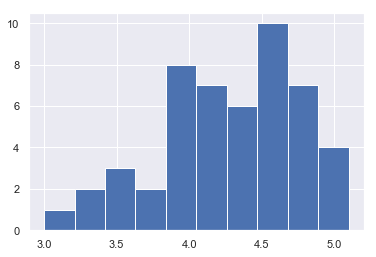

In [27]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

## Axis labels!

In the last exercise, you made a nice histogram of petal lengths of Iris versicolor, but you didn't label the axes! That's ok; it's not your fault since we didn't ask you to. Now, add axis labels to the plot using `plt.xlabel()` and `plt.ylabel()`. Don't forget to add units and assign both statements to _. The packages matplotlib.pyplot and seaborn are already imported with their standard aliases. This will be the case in what follows, unless specified otherwise.

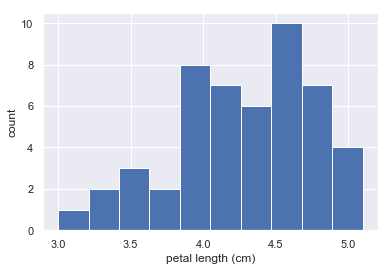

In [28]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')


# Show histogram
plt.show()

## Adjusting the number of bins in a histogram

The histogram you just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: `choose the number of bins to be the square root of the number of samples`. Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. You specify the number of bins using the bins keyword argument of `plt.hist()`.

The plotting utilities are already imported and the seaborn defaults already set. The variable you defined in the last exercise, versicolor_petal_length, is already in your namespace.

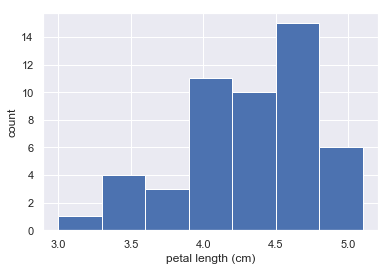

In [29]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

## Bee swarm plot

Make a **bee swarm plot** of the iris petal lengths. Your x-axis should contain each of the three species, and the y-axis the petal lengths. A data frame containing the data is in your namespace as `df`.

You can use `sns.swarmplot?` or `help(sns.swarmplot)` for more details on how to make bee swarm plots using seaborn.

In [40]:
df = pd.read_csv(path+'iris_dataset.csv', index_col=0)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
#sns.swarmplot?

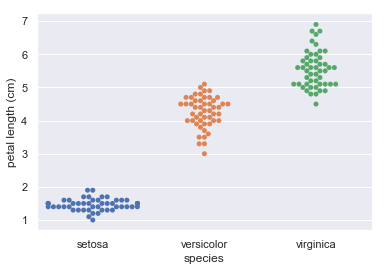

In [41]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

I. virginica petals tend to be the longest, and I. setosa petals tend to be the shortest of the three species. Notice that we said "tend to be." Some individual I. virginica flowers may be shorter than individual I. versicolor flowers. It is also possible that an individual I. setosa flower may have longer petals than in individual I. versicolor flower, though this is highly unlikely, and was not observed by Anderson.

## Computing the ECDF (Empirical Cumulative Distribution Function)

In this exercise, you will write a function that takes as input a 1D array of data and then returns the x and y values of the **ECDF (Empirical Cumulative Distribution Function)**. You will use this function over and over again throughout this course and its sequel. ECDFs are among the most important plots in statistical analysis. With a CDF function there is no **bins bias** like in histograms.

In [42]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

## Plotting the ECDF

You will now use your `ecdf()` function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. You will then plot the ECDF. Recall that your ecdf() function returns two arrays so you will need to **unpack** them. An example of such unpacking is `x, y = foo(data)`, for some function `foo()`.

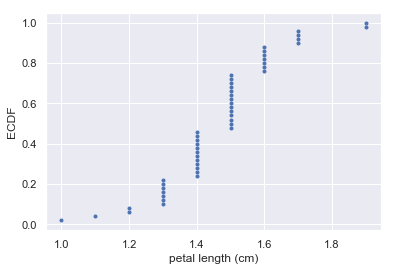

In [70]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(df[df['species'] == 'setosa']['petal length (cm)'])

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')


# Display the plot
plt.show()

## Comparison of ECDFs

ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species. You already wrote a function to generate ECDFs so you can put it to good use!

To overlay all three ECDFs on the same plot, you can use `plt.plot()` three times, once for each ECDF. Remember to include `marker='.'` and `linestyle='none'` as arguments inside `plt.plot()`.

In [45]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
# df[df['species'] == 'setosa']['petal length (cm)']

In [52]:
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

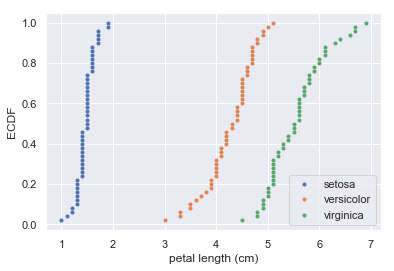

In [50]:
# Compute ECDFs
x_set, y_set = ecdf(df[df['species'] == 'setosa']['petal length (cm)'])
x_vers, y_vers = ecdf(df[df['species'] == 'versicolor']['petal length (cm)'])
x_virg, y_virg = ecdf(df[df['species'] == 'virginica']['petal length (cm)'])

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

## Means and medians

**Outliers** are data points whose value is far greater or less than most of the rest of the data. An **outlier** can significantly affect the value of the **mean**, but not the **median**.

In [53]:
np.mean(df[df['species'] == 'versicolor']['petal length (cm)'])

4.26

In [54]:
np.median(df[df['species'] == 'versicolor']['petal length (cm)'])

4.35

## Computing percentiles
In this exercise, you will compute the percentiles of petal length of Iris versicolor.

In [55]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(df[df['species'] == 'versicolor']['petal length (cm)'], percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


## Comparing percentiles to ECDF

To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated earlier.

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

Plot the percentiles as red diamonds on the ECDF. Pass the x and y co-ordinates - ptiles_vers and percentiles/100 - as positional arguments and specify the `marker='D'`, `color='red'` and `linestyle='none'` keyword arguments. The argument for the y-axis - percentiles/100 has been specified for you.

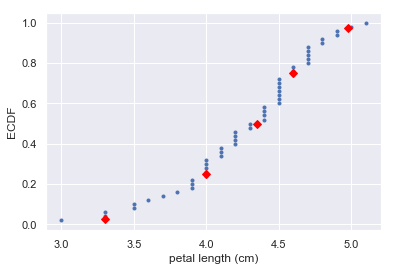

In [56]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

## Box-and-whisker plot

Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. Make a box plot of the iris petal lengths. 

You can use `sns.boxplot?` or `help(sns.boxplot)` for more details on how to make box plots using seaborn.

<img src="images/boxplot.png" alt="" style="width: 600px;"/>


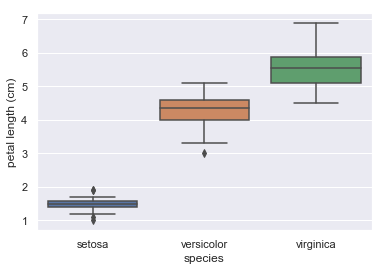

In [57]:
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)

_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

plt.show()

## Computing the variance

**Variance** is the mean squared distance of the data from their mean (a measure of the spread of data). As **variance** is in squared units, there is the **standard deviation** meatric which is calculated as sqared root of the **variance**. The **standard deviation** is a reasonable metric to measure the typical spread of data.

<img src="images/std.png" alt="" style="width: 400px;"/>

We will explicitly compute the variance of the petal length of Iris veriscolor using the equations discussed in the videos. We will then use `np.var()` to compute it.

In [59]:
versicolor_petal_length = np.array(df[df['species'] == 'versicolor']['petal length (cm)'])

# Array of differences to mean: differences
differences = np.array(versicolor_petal_length - np.mean(versicolor_petal_length))

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)


# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


## The standard deviation and the variance

As mentioned, the **standard deviation** is the square root of the **variance**. You will see this for yourself by computing the standard deviation using `np.std()` and comparing it to what you get by computing the variance with `np.var()` and then computing the square root.

In [60]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))


# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


## Scatter plots

When you made **bee swarm plots**, **box plots**, and **ECDF plots** in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a **scatter plot** of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

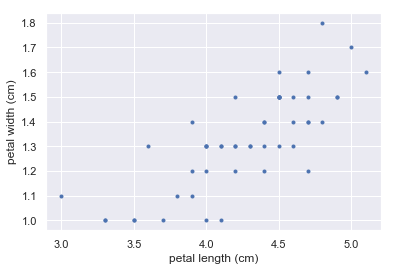

In [63]:
versicolor_petal_length = np.array(df[df['species'] == 'versicolor']['petal length (cm)'])
versicolor_petal_width = np.array(df[df['species'] == 'versicolor']['petal width (cm)'])

# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()

## Computing the covariance

The **covariance** may be computed using the Numpy function `np.cov()`. For example, we have two sets of data x and y, `np.cov(x, y)` returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the **covariance matrix**, since it organizes the self- and covariance.

<img src="images/cov.png" alt="" style="width: 600px;"/>


In [64]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


## Computing the Pearson correlation coefficient

The **Pearson correlation coefficient**, also called the Pearson r, is often easier to interpret than the **covariance**. It is computed using the `np.corrcoef()` function. Like `np.cov()`, it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In this exercise, you will write a function, `pearson_r(x, y)` that takes in two arrays and returns the **Pearson correlation coefficient**. You will then use this function to compute it for the petal lengths and widths of I. versicolor.

<img src="images/pearson_corr.png" alt="" style="width: 600px;"/>


In [65]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix:   corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


## What is the goal of statistical inference?

**Statistical inference** involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions. Why do we do statistical inference?

- To draw probabilistic conclusions about what we might expect if we collected the same data again.
- To draw actionable conclusions from data.
- To draw more general conclusions from relatively few data or observations.

**Probability** Probability provides a precise measure of uncertainty. Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.

**Haker statistics** uses simulated repeated measurements to compute probabilities.

**Bernoulli trial** an experiment that has two options: success (True) or failure (False).

## Generating random numbers using the np.random module

We will be hammering the `np.random module` for the rest of this course. Actually, you will probably call functions from this module more than any other while wearing your **hacker statistician** hat. Let's start by taking its simplest function, `np.random.random()` for a test spin. The function returns a random number between zero and one.

In this exercise, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. `If the numbers are truly random, all bars in the histogram should be of (close to) equal height`.

To generate 4 random numbers you can pass the keyword argument `size=4` to `np.random.random()`. Such an approach is more efficient than a for loop: in this exercise, however, you will write a for loop to experience hacker statistics as the practice of repeating an experiment over and over again.

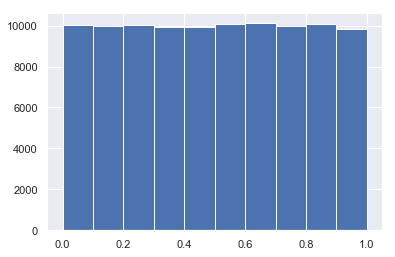

In [66]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(0, len(random_numbers)):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

The histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

## The np.random module and Bernoulli trials

You can think of a **Bernoulli trial** as a flip of a possibly biased coin. Specifically, `each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure)`. In this exercise, you will write a function to perform n Bernoulli trials, `perform_bernoulli_trials(n, p)`, which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the `np.random.random()` function, which returns a random number between zero and one.

In [67]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

## How many defaults might we expect?

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is `p = 0.05`. To investigate this, you will do a **simulation**. You will perform 100 Bernoulli trials using the `perform_bernoulli_trials()` function you wrote in the previous exercise and record how many defaults we get. `Here, a success is a default`. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


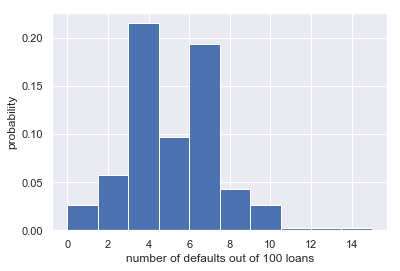

In [68]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
# Write a for loop with 1000 iterations to compute the number of defaults 
#  per 100 loans using the perform_bernoulli_trials() function. 
#  It accepts two arguments: the number of trials n - in this case 100 - 
#  and the probability of success p - in this case the probability 
#  of a default, which is 0.05. On each iteration of the loop store 
#  the result in an entry of n_defaults.
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
# Include the normed=True keyword argument so that the height of the bars of the histogram 
#  indicate the probability.
#  With normed=True, we do this so the histogram approximates a probability density function PDF 
#  (the area under the PDF gives the probability)
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

This is actually not an optimal way to plot a histogram when the results are known to be integers. We will revisit this in forthcoming exercises.

## Will the bank fail?

Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

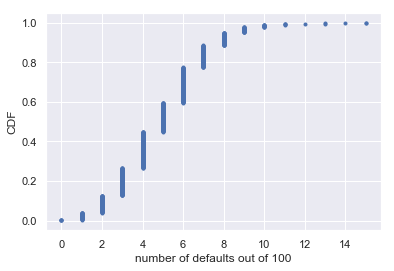

Probability of losing money = 0.022


In [69]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
# Compute the total number of entries in your n_defaults array 
#  that were greater than or equal to 10. To do so, 
#  compute a boolean array that tells you whether a given entry of n_defaults is >= 10. 
#  Then sum all the entries in this array using np.sum(). 
#  For example, np.sum(n_defaults <= 5) would compute the number 
#  of defaults with 5 or fewer defaults.
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

## Sampling out of the Binomial distribution

Compute the probability **mass function** for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using `np.random.binomial()`. This is identical to the calculation you did in the last set of exercises using your custom-written `perform_bernoulli_trials()` function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the `CDF` as last time. This CDF that you are plotting is that of the **Binomial distribution**.

**PMF (Probability Mass Function)** defines set of probabilities of discrete outcomes. **Probability distribution** is a mathematical description of outcomes.

In [71]:
np.random.seed(42)

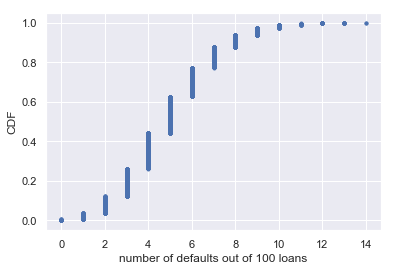

In [72]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

## Plotting the Binomial PMF

As mentioned in the video, plotting a nice looking **PMF** requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to `plt.hist()` via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. You can generate an array like this using `np.arange()` and then subtracting 0.5 from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array `n_defaults`.

/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


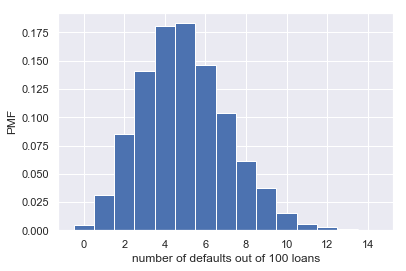

In [73]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, normed=True, bins=bins)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()

## Relationship between Binomial and Poisson distributions

**Poisson process** - the timing of the next event is completely independent of when the previous event happened.

You just heard that the **Poisson distribution** is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a **Bernoulli trial** every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is **Binomially distributed**, and we would expect to get about 6 successes. This is just like the Poisson story, where we get on average 6 hits on a website per hour. So, the **Poisson distribution** with arrival rate equal to np approximates a **Binomial distribution** for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the **Poisson distribution** is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that np=10.

In [74]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(1000, 0.01, 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      9.9732 3.1276319732347027
n = 20 Binom: 9.9907 3.1556637194099117
n = 100 Binom: 9.9977 3.140110620662909
n = 1000 Binom: 9.997 3.124162447761


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.

## Interpreting PDFs

Consider the PDF shown below. Which of the following is true?

- x is more likely than not less than 10. (correct)
- x is more likely than not greater than 10.
- We cannot tell from the PDF if x is more likely to be greater than or less than 10.
- This is not a valid PDF because it has two peaks.

<img src="images/pdf-example.png" alt="" style="width: 400px;"/>

Yes. The probability is given by the area under the PDF, and there is more area to the left of 10 than to the right.

## Interpreting CDFs

Below is the CDF corresponding to the PDF you considered in the last exercise. Using the CDF, what is the probability that x is greater than 10?

- 0.25 (correct)
- 0.75
- 3.75
- 15

<img src="images/cdf-example.png" alt="" style="width: 800px;"/>

The value of the CDF at x = 10 is 0.75, so the probability that x < 10 is 0.75. Thus, the probability that x > 10 is 0.25.

## PDF and CDF of Normal Distribution

**PDF (Probability Density Function)** is a continuous analog to **PMF**, describes mathematically the relative likelihood of observing a value of a continuous variable.

<img src="images/normal-pdf.png" alt="" style="width: 400px;"/> <img src="images/normal-cdf.png" alt="" style="width: 400px;"/>

## The Normal PDF

In this exercise, you will explore the **Normal PDF** and also learn a way to plot a PDF of a known distribution using **hacker statistics**. Specifically, you will plot a **Normal PDF** for various values of the variance.

In [75]:
np.random.seed(42)

/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


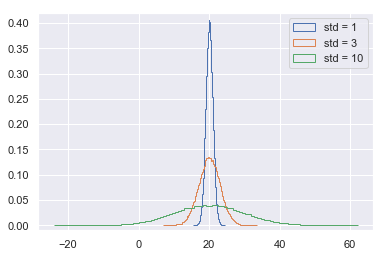

In [76]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
# Draw 100,000 samples from a Normal distribution that has a mean of 20 
#  and a standard deviation of 1. Do the same for Normal distributions 
#  with standard deviations of 3 and 10, each still with a mean of 20. 
#  Assign the results to samples_std1, samples_std3 
#  and samples_std10, respectively.
samples_std1 = np.random.normal(20, 1, size=100000) 
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
plt.hist(samples_std1, normed=True, histtype='step', bins=100)
plt.hist(samples_std3, normed=True, histtype='step', bins=100)
plt.hist(samples_std10, normed=True, histtype='step', bins=100)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

You can see how the different standard deviations result in PDFs of different widths. The peaks are all centered at the mean of 20.

## The Normal CDF

Now that you have a feel for how the Normal PDF looks, let's consider its **CDF**. Using the samples you generated in the last exercise (in your namespace as samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

In [77]:
np.random.seed(42)

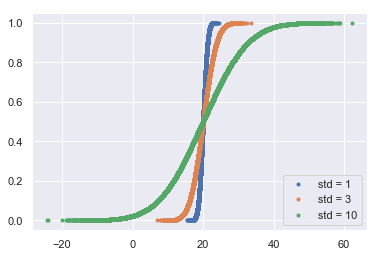

In [78]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1) 
x_std3, y_std3 = ecdf(samples_std3) 
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

## Are the Belmont Stakes results Normally distributed?

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. [Secretariat](https://en.wikipedia.org/wiki/Secretariat_(horse)) ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the **mean** and **standard deviation** of the Belmont winners' times. `Sample out of a Normal distribution` with this mean and standard deviation using the `np.random.normal()` function and `plot a CDF`. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

The data concerning the Belmont Stakes is scraped from the [Belmont Wikipedia page](https://en.wikipedia.org/wiki/Belmont_Stakes).

In [80]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7, 150.42000000000002, 150.88, 151.57, 147.54, 149.65, 148.74, 147.86, 148.75, 147.5, 148.26, 149.71, 146.56, 151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97, 146.13, 148.1, 147.2, 146.0, 146.4, 148.2, 149.8, 147.0, 147.2, 147.8, 148.2, 149.0, 149.8, 148.6, 146.8, 149.6, 149.0, 148.2, 149.2, 148.0, 150.4, 148.8, 147.2, 148.8, 149.6, 148.4, 148.4, 150.2, 148.8, 149.2, 149.2, 148.4, 150.2, 146.6, 149.8, 149.0, 150.8, 148.6, 150.2, 149.0, 148.6, 150.2, 148.2, 149.4, 150.8, 150.2, 152.2, 148.2, 149.2, 151.0, 149.6, 149.6, 149.4, 148.6, 150.0, 150.6, 149.2, 152.6, 152.8, 149.6, 151.6, 152.8, 153.2, 152.4, 152.2])
np.random.seed(42)

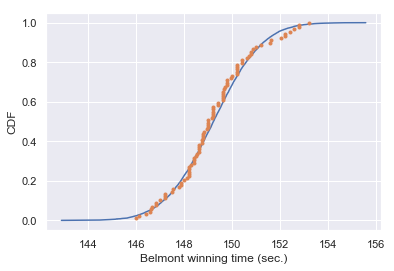

In [81]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

## What are the chances of a horse matching or beating Secretariat's record?

Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [82]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000593


We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

## Waiting for the next Secretariat (The Exponential Distribution)

Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? Choose the best answer.

- Normal, because the distribution of Belmont winning times are Normally distributed.
- Normal, because there is a most-expected waiting time, so there should be a single peak to the distribution.
- Exponential: It is very unlikely for a horse to be faster than Secretariat, so the distribution should decay away to zero for high waiting time.
- Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed. (correct)

The Exponential distribution describes the waiting times between rare events, and Secretariat is rare!

## If you have a story, you can simulate it!

Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a **Poisson process**, so the time between hits of the cycle are also **Exponentially distributed**.

`How long must we wait to see both a no-hitter and then a batter hit the cycle?` The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way,` what is the total waiting time for the arrival of two different Poisson processes?` The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

Define a function with call signature `successive_poisson(tau1, tau2, size=1)` that samples the waiting time for a no-hitter and a hit of the cycle.
- Draw waiting times `tau1` (size number of samples) for the no-hitter out of an exponential distribution and assign to t1.
- Draw waiting times `tau2` (size number of samples) for hitting the cycle out of an exponential distribution and assign to t2.
- The function returns the sum of the waiting times for the two events.

In [83]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

## Distribution of no-hitters and cycles

Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


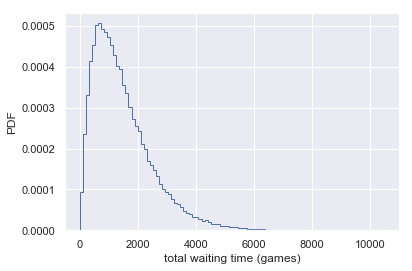

In [84]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
_ = plt.hist(waiting_times, normed=True, bins=100, histtype='step')


# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. For fun (and enlightenment), I encourage you to also plot the CDF.

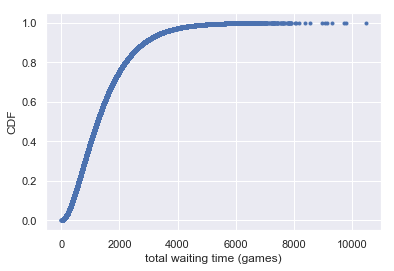

In [86]:
x, y, = ecdf(waiting_times)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('CDF')

## How often do we get no-hitters?

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array `nohitter_times`.

If you assume that no-hitters are described as a **Poisson process**, then the time between no-hitters is **Exponentially distributed**. As you have seen, the **Exponential distribution** has a single parameter, which we will call `τ`, the typical interval time. The value of the parameter `τ` that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use `np.random.exponential()` to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the `τ` you found and plot the histogram as an approximation to the `PDF`.

NumPy, pandas, matlotlib.pyplot, and seaborn have been imported for you as np, pd, plt, and sns, respectively.

In [87]:
nohitter_times = np.array([843, 1613, 1101, 215, 684, 814, 278, 324, 161, 219, 545, 715, 966, 624, 29, 450, 107, 20, 91, 1325, 124, 1468, 104, 1309, 429, 62, 1878, 1104, 123, 251, 93, 188, 983, 166, 96, 702, 23, 524, 26, 299, 59, 39, 12, 2, 308, 1114, 813, 887, 645, 2088, 42, 2090, 11, 886, 1665, 1084, 2900, 2432, 750, 4021, 1070, 1765, 1322, 26, 548, 1525, 77, 2181, 2752, 127, 2147, 211, 41, 1575, 151, 479, 697, 557, 2267, 542, 392, 73, 603, 233, 255, 528, 397, 1529, 1023, 1194, 462, 583, 37, 943, 996, 480, 1497, 717, 224, 219, 1531, 498, 44, 288, 267, 600, 52, 269, 1086, 386, 176, 2199, 216, 54, 675, 1243, 463, 650, 171, 327, 110, 774, 509, 8, 197, 136, 12, 1124, 64, 380, 811, 232, 192, 731, 715, 226, 605, 539, 1491, 323, 240, 179, 702, 156, 82, 1397, 354, 778, 603, 1001, 385, 986, 203, 149, 576, 445, 180, 1403, 252, 675, 1351, 2983, 1568, 45, 899, 3260, 1025, 31, 100, 2055, 4043, 79, 238, 3931, 2351, 595, 110, 215, 0, 563, 206, 660, 242, 577, 179, 157, 192, 192, 1848, 792, 1693, 55, 388, 225, 1134, 1172, 1555, 31, 1582, 1044, 378, 1687, 2915, 280, 765, 2819, 511, 1521, 745, 2491, 580, 2072, 6450, 578, 745, 1075, 1103, 1549, 1520, 138, 1202, 296, 277, 351, 391, 950, 459, 62, 1056, 1128, 139, 420, 87, 71, 814, 603, 1349, 162, 1027, 783, 326, 101, 876, 381, 905, 156, 419, 239, 119, 129, 467])


/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


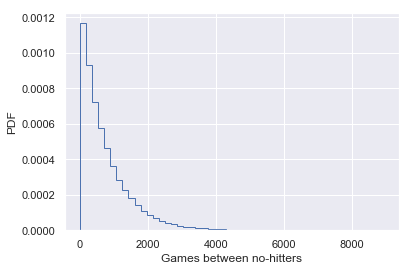

In [88]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

## Do the data follow our story?

You have modeled no-hitters using an **Exponential distribution**. Create an **ECDF** of the real data. `Overlay the theoretical CDF with the ECDF from the data`. This helps you to verify that the Exponential distribution describes the observed data.

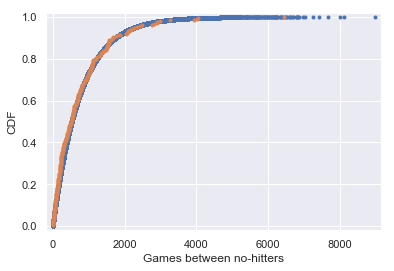

In [89]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor, marker='.', linestyle='none')
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

## How is this parameter optimal?

Now sample out of an exponential distribution with `τ` being twice as large as the optimal `τ`. Do it again for `τ` half as large. Make `CDFs` of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the `τ` you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

Note: In this and all subsequent exercises, the random number generator is pre-seeded for you to save you some typing.

In [90]:
np.random.seed(42)

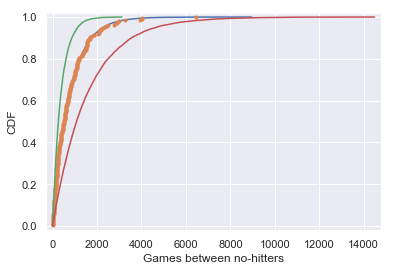

In [91]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

Notice how the value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.

## EDA of literacy/fertility data

In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array `fertility` has the corresponding fertility data.

<img src="images/slope-intercept.png" alt="" style="width: 400px;"/>

**slope** - how steep the line is

**intercept** - sets where the line croses the y axis

<img src="images/residual.png" alt="" style="width: 400px;"/>

**residual** - vertical distance from a point and the line

**Least squares** - the process of finding the parameters for which the sum of the squares of the residuals is minimal.

In [92]:
illiteracy = np.array([9.5, 49.2, 1.0, 11.200000000000003, 9.799999999999997, 60.0, 50.2, 51.2, 0.5999999999999943, 1.0, 8.5, 6.099999999999994, 9.799999999999997, 1.0, 42.2, 77.2, 18.700000000000003, 22.799999999999997, 8.5, 43.9, 1.0, 1.0, 1.5, 10.799999999999997, 11.900000000000006, 3.4000000000000057, 0.4000000000000057, 3.0999999999999943, 6.599999999999994, 33.7, 40.4, 2.299999999999997, 17.200000000000003, 0.7000000000000028, 36.1, 1.0, 33.2, 55.9, 30.799999999999997, 87.4, 15.400000000000006, 54.6, 5.099999999999994, 1.0999999999999943, 10.200000000000003, 19.799999999999997, 0.0, 40.7, 57.2, 59.9, 3.0999999999999943, 55.7, 22.799999999999997, 10.900000000000006, 34.7, 32.2, 43.0, 1.2999999999999972, 1.0, 0.5, 78.4, 34.2, 84.9, 29.099999999999994, 31.299999999999997, 18.299999999999997, 81.8, 39.0, 11.200000000000003, 67.0, 4.099999999999994, 0.20000000000000284, 78.1, 1.0, 7.099999999999994, 1.0, 29.0, 1.0999999999999943, 11.700000000000003, 73.6, 33.900000000000006, 14.0, 0.29999999999999716, 1.0, 0.7999999999999972, 71.9, 40.1, 1.0, 2.0999999999999943, 3.799999999999997, 16.5, 4.099999999999994, 0.5, 44.4, 46.3, 18.700000000000003, 6.5, 36.8, 18.599999999999994, 11.099999999999994, 22.099999999999994, 71.1, 1.0, 0.0, 0.9000000000000057, 0.7000000000000028, 45.5, 8.400000000000006, 0.0, 3.799999999999997, 8.5, 2.0, 1.0, 58.9, 0.29999999999999716, 1.0, 14.0, 47.0, 4.099999999999994, 2.200000000000003, 7.200000000000003, 0.29999999999999716, 1.5, 50.5, 1.2999999999999972, 0.5999999999999943, 19.099999999999994, 6.900000000000006, 9.200000000000003, 2.200000000000003, 0.20000000000000284, 12.299999999999997, 4.900000000000006, 4.599999999999994, 0.29999999999999716, 16.5, 65.7, 63.5, 16.799999999999997, 0.20000000000000284, 1.7999999999999972, 9.599999999999994, 15.200000000000003, 14.400000000000006, 3.299999999999997, 10.599999999999994, 61.3, 10.900000000000006, 32.2, 9.299999999999997, 11.599999999999994, 20.700000000000003, 6.5, 6.700000000000003, 3.5, 1.0, 1.5999999999999943, 20.5, 1.5, 16.700000000000003, 2.0, 0.9000000000000057])
fertility = np.array([1.7690000000000001, 2.682, 2.077, 2.1319999999999997, 1.827, 3.872, 2.2880000000000003, 5.172999999999999, 1.393, 1.262, 2.156, 3.0260000000000002, 2.033, 1.324, 2.8160000000000003, 5.211, 2.1, 1.781, 1.8219999999999998, 5.9079999999999995, 1.881, 1.8519999999999999, 1.39, 2.281, 2.505, 1.224, 1.361, 1.4680000000000002, 2.404, 5.52, 4.058, 2.2230000000000003, 4.859, 1.2670000000000001, 2.342, 1.579, 6.254, 2.334, 3.9610000000000003, 6.505, 2.53, 2.823, 2.498, 2.248, 2.508, 3.04, 1.854, 4.22, 5.1, 4.967, 1.325, 4.513999999999999, 3.173, 2.3080000000000003, 4.62, 4.541, 5.6370000000000005, 1.926, 1.7469999999999999, 2.294, 5.841, 5.455, 7.069, 2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89, 1.385, 1.505, 6.081, 1.784, 1.3780000000000001, 1.45, 1.841, 1.37, 2.612, 5.329, 5.33, 3.3710000000000004, 1.281, 1.871, 2.153, 5.377999999999999, 4.45, 1.46, 1.436, 1.6119999999999999, 3.19, 2.752, 3.35, 4.01, 4.166, 2.642, 2.977, 3.415, 2.295, 3.0189999999999997, 2.6830000000000003, 5.165, 1.849, 1.8359999999999999, 2.5180000000000002, 2.43, 4.5280000000000005, 1.263, 1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.5819999999999999, 2.025, 1.841, 5.011, 1.212, 1.5019999999999998, 2.516, 1.367, 2.089, 4.388, 1.854, 1.7480000000000002, 2.978, 2.1519999999999997, 2.362, 1.9880000000000002, 1.426, 3.29, 3.264, 1.436, 1.393, 2.822, 4.968999999999999, 5.659, 3.24, 1.693, 1.6469999999999998, 2.36, 1.7919999999999998, 3.45, 1.516, 2.233, 2.563, 5.2829999999999995, 3.885, 0.966, 2.373, 2.6630000000000003, 1.251, 2.052, 3.3710000000000004, 2.093, 2.0, 3.883, 3.852, 3.718, 1.732, 3.928])
np.random.seed(42)    

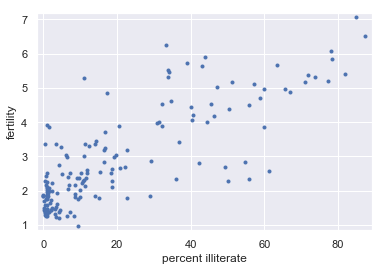

0.8041324026815344


In [93]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

You can see the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

## Linear regression

We will assume that fertility is a linear function of the female illiteracy rate. That is, `f=ai+b`, where `a` is the **slope** and `b` is the **intercept**. We can think of the **intercept** as the minimal fertility rate, probably somewhere between one and two. The **slope** tells us how the fertility rate varies with illiteracy. We can find the best fit line using `np.polyfit()`.

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


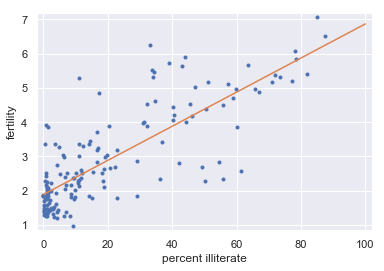

In [95]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Draw the plot
plt.show()

## How is it optimal?

The function `np.polyfit()` that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as `RSS` (for `residual sum of squares`). In this exercise, you will plot the function that is being optimized, the `RSS`, versus the slope parameter `a`. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

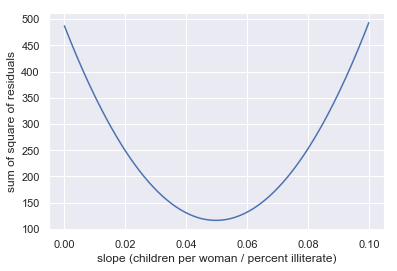

In [96]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
# The empty_like() function returns a new array with the same shape 
#  and type as a given array (in this case, a_vals).
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.

## Look Before you Leap

<img src="images/anscombe-quartet.png" alt="" style="width: 400px;"/>

- Do graphical EDA first
- Explore you data first

## Linear regression on appropriate Anscombe data

For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [97]:
x = np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
y = np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84, 4.82,  5.68])

0.5000909090909095 3.000090909090909


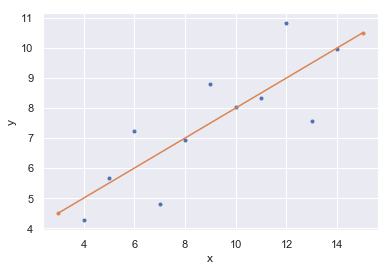

In [99]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor, marker='.')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

## Linear regression on all Anscombe data

Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, you will compute the slope and intercept for each set. The data are stored in lists; `anscombe_x = [x1, x2, x3, x4]` and `anscombe_y = [y1, y2, y3, y4]`, where, for example, x2 and y2 are the x and y values for the second Anscombe data set.

In [100]:
x1 = np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
x2 = np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
x3 = np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
x4 = np.array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.])
y1 = np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84, 4.82,  5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74])
y3 = np.array([ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15, 6.42,  5.73])
y4 = np.array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56, 7.91,  6.89])

anscombe_x = np.array([x1, x2, x3, x4])
anscombe_y = np.array([y1, y2, y3, y4])

In [101]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.000090909090909
slope: 0.5000000000000004 intercept: 3.0009090909090896
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.4999090909090908 intercept: 3.0017272727272735


## Bootstrapping - Getting the terminology down

Getting tripped up over terminology is a common cause of frustration in students. Unfortunately, you often will read and hear other data scientists using different terminology for bootstrap samples and replicates. This is even more reason why we need everything to be clear and consistent for this course. So, before going forward discussing bootstrapping, let's get our terminology down. If we have a data set with n repeated measurements, a **bootstrap sample** is an array of length n that was drawn from the original data with replacement. What is a **bootstrap replicate**? A single value of a statistic computed from a bootstrap sample.

**Bootstrapping** - the use of resampled data to perform statistical inference.

**Bootstrap sample** - each resampled array ot the data.

**Bootrstrap replicate** - a statistic computed from a resampled array. A simulated replica of the original data acquired by bootstrapping.

## Bootstrapping by hand

To help you gain intuition about how **bootstrapping** works, imagine you have a data set that has only three points, `[-1, 0, 1]`. How many unique bootstrap samples can be drawn (e.g., [-1, 0, 1] and [1, 0, -1] are unique), and what is the maximum mean you can get from a bootstrap sample? It might be useful to jot down the samples on a piece of paper.

(These are too few data to get meaningful results from bootstrap procedures, but this example is useful for intuition.)

Answer: There are 27 total bootstrap samples, and one of them, [1,1,1] has a mean of 1. Conversely, 7 of them have a mean of zero.

## Visualizing bootstrap samples

In this exercise, you will generate **bootstrap samples** from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array `rainfall` in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

Write a for loop to acquire 50 bootstrap samples of the rainfall data and plot their ECDF.
- Use `np.random.choice()` to generate a bootstrap sample from the NumPy array `rainfall`. Be sure that the size of the resampled array is `len(rainfall)`.
- Use the function `ecdf()` that you wrote in the prequel to this course to generate the x and y values for the ECDF of the bootstrap sample `bs_sample`.
- Plot the ECDF values. Specify `color='gray'` (to make gray dots) and `alpha=0.1` (to make them semi-transparent, since we are overlaying so many) in addition to the `marker='.'` and `linestyle='none'` keyword arguments.

In [102]:
rainfall = np.array([875.5, 648.2, 788.1, 940.3000000000001, 491.09999999999997, 743.5, 730.1, 686.4999999999999, 878.8, 865.5999999999999, 654.9, 831.4999999999999, 798.1, 681.8000000000001, 743.8, 689.1, 752.1, 837.2, 710.5999999999999, 749.1999999999999, 967.0999999999999, 701.1999999999999, 619.0, 747.5999999999999, 803.4, 645.6, 804.1, 787.4, 646.8, 997.0999999999999, 774.0, 734.5, 835.0, 840.7000000000002, 659.5999999999999, 828.3, 909.7, 856.9000000000001, 578.3000000000001, 904.2, 883.9, 740.0999999999999, 773.9, 741.4000000000001, 866.8000000000001, 871.1, 712.5, 919.1999999999999, 927.9, 809.4, 633.8, 626.8000000000001, 871.3, 774.2999999999998, 898.8, 789.5999999999999, 936.3, 765.4, 882.1, 681.1, 661.3, 847.9, 683.9, 985.6999999999999, 771.1, 736.6, 713.2, 774.5, 937.6999999999999, 694.5000000000001, 598.2, 983.8, 700.1999999999999, 901.2999999999998, 733.4999999999999, 964.4, 609.3, 1035.2, 717.9999999999999, 688.6, 736.8000000000001, 643.3, 1038.5, 968.9999999999999, 802.7, 876.5999999999998, 944.7, 786.5999999999999, 770.4, 808.6, 761.3, 774.1999999999999, 559.3000000000001, 674.1999999999999, 883.6, 823.9, 960.3999999999999, 877.8000000000002, 940.6, 831.8000000000001, 906.2, 866.5, 674.0999999999999, 998.1000000000001, 789.3000000000001, 915.0, 737.1, 762.9999999999999, 666.6999999999999, 824.5, 913.8, 905.0999999999999, 667.8, 747.4000000000001, 784.6999999999999, 925.4000000000001, 880.2, 1086.8999999999999, 764.3999999999999, 1050.1000000000001, 595.1999999999999, 855.2000000000002, 726.9, 785.1999999999999, 948.8, 970.6, 896.0, 618.4000000000001, 572.4, 1146.4, 728.1999999999999, 864.1999999999998, 793.0])


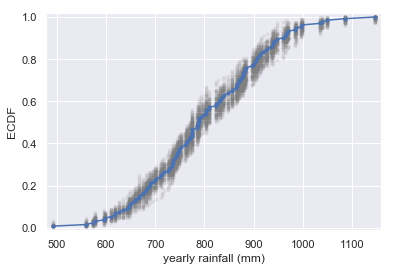

In [103]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

Notice how the bootstrap samples give an idea of how the distribution of rainfalls is spread.

## Confidence Interval of a Statistic

`If we repeted measurements over and over again, p% of observed values would lie within the p% confidence interval`.

<img src="images/conf-interval.png" alt="" style="width: 800px;"/>

## Generating many bootstrap replicates

You'll write a function, `draw_bs_reps(data, func, size=1)`, which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

Define a function with call signature `draw_bs_reps(data, func, size=1)`.
- Using `np.empty()`, initialize an array called `bs_replicates` of size `size` to hold all of the bootstrap replicates.
- Write a for loop that ranges over size and computes a replicate using `bootstrap_replicate_1d()`. Store the replicate in the appropriate index of `bs_replicates`.
- Return the array of replicates `bs_replicates`.

In [104]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [105]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

## Bootstrap replicates of the mean and the SEM (Standard Error of the Mean)

In this exercise, you will compute a bootstrap estimate of the **probability density function** of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a **probabilistic estimate of the mean**. You will plot the **PDF as a histogram**, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The **standard deviation** of this distribution, called the **standard error of the mean**, or **SEM**, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, `sem = np.std(data) / np.sqrt(len(data))`. Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

The dataset has been pre-loaded for you into an array called `rainfall`.

10.51054915050619
10.46639354664973


/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


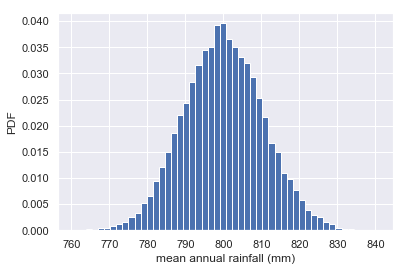

In [106]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

## Confidence intervals of rainfall data

A **confidence interval** gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the **bootstrap method** is that you can take percentiles of your **bootstrap replicates** to get your **confidence interval**. Conveniently, you can use the `np.percentile()` function.

Use the **bootstrap replicates** you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as `bs_replicates`. What is the 95% confidence interval?

In [108]:
np.percentile(bs_replicates, [2.5, 97.5])

array([779.76992481, 820.90345865])

It's simple to get confidence intervals using bootstrap!

## Bootstrap replicates of other statistics

We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take **bootstrap replicates**! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

Here, you will make use of the `draw_bs_reps()` function you defined a few exercises ago. It is provided below for your reference:

In [ ]:
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


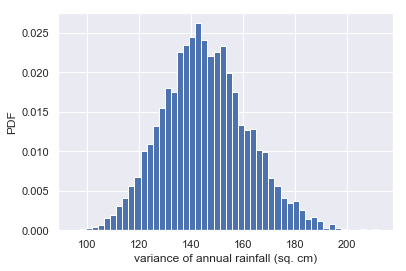

In [109]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, normed=True, bins=50)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

`This is not normally distributed`, as it has a longer tail to the right. Note that you can also compute a **confidence interval** on the variance, or any other statistic, using `np.percentile()` with your **bootstrap replicates**.

In [110]:
np.percentile(bs_replicates, [2.5, 97.5])

array([115.17718193, 180.30394418])

## Confidence interval on the rate of no-hitters

Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter `τ`. Plot a histogram of your replicates and report a 95% confidence interval.

- Generate 10000 bootstrap replicates of τ from the nohitter_times data using your draw_bs_reps() function. Recall that the optimal τ is calculated as the mean of the data.
- Compute the 95% confidence interval using np.percentile() and passing in two arguments: The array bs_replicates, and the list of percentiles - in this case 2.5 and 97.5.
- Print the confidence interval.

95% confidence interval = [663.662749   871.55956175] games


/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


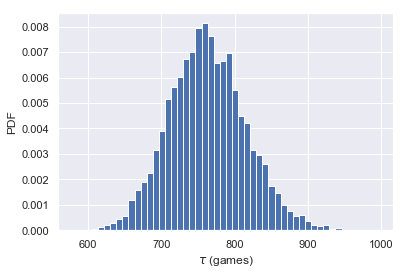

In [111]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

This gives you an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.

## A function to do pairs bootstrap

**Pairs bootstrap** involves resampling pairs of data. Each collection of pairs fit with a line, in this case using `np.polyfit()`. We do this again and again, getting **bootstrap replicates** of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of `x,y` data.

**Nonparametric inference** - done without any assumption regarding the model or probability distribution  underlying the data. (A parametric estimation was done when we were using a linear model with slope and intercept - see above).

**We should think probabilistacally**

Define a function with call signature `draw_bs_pairs_linreg(x, y, size=1)` to perform **pairs bootstrap** estimates on linear regression parameters.
- Use `np.arange()` to set up an array of indices going from `0` to `len(x)`. These are what you will resample and use them to pick values out of the x and y arrays.
- Use `np.empty()` to initialize the slope and intercept replicate arrays to be of `size` size.
- Write a for loop to:
    - Resample the indices `inds`. Use `np.random.choice()` to do this.
    - Make new `x` and `y` arrays `bs_x` and `bs_y` using the the resampled indices `bs_inds`. To do this, slice `x` and `y` with `bs_inds`.
    - Use `np.polyfit()` on the new `x` and `y` arrays and store the computed **slope** and **intercept**.
- Return the pair bootstrap replicates of the slope and intercept.

In [113]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    #return bs_slope_reps, bs_intercept_reps
    return bs_slope_reps, bs_intercept_reps

## Pairs bootstrap of literacy/fertility data

Using the function you just wrote, perform **pairs bootstrap** to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays illiteracy and fertility.

As a reminder, `draw_bs_pairs_linreg()` has a function signature of `draw_bs_pairs_linreg(x, y, size=1)`, and it returns two values: `bs_slope_reps` and `bs_intercept_reps`.

[0.04445885 0.05540291]


/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


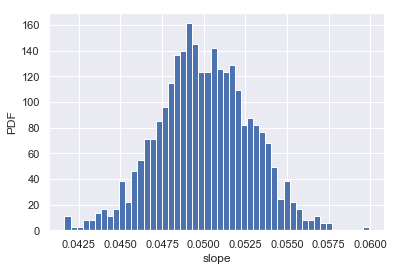

In [114]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

## Plotting bootstrap regressions

A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as `bs_slope_reps` and `bs_intercept_reps`).

- Generate an array of x-values consisting of 0 and 100 for the plot of the regression lines. Use the `np.array()` function for this.
- Write a for loop in which you plot a regression line with a slope and intercept given by the pairs bootstrap replicates. Do this for 100 lines.
    - When plotting the regression lines in each iteration of the for loop, recall the regression equation `y = a*x + b`. Here, `a` is `bs_slope_reps[i]` and `b` is `bs_intercept_reps[i]`.
    - Specify the keyword arguments `linewidth=0.5`, `alpha=0.2`, and `color='red'` in your call to `plt.plot()`.
- Make a scatter plot with `illiteracy` on the x-axis and `fertility` on the y-axis. Remember to specify the `marker='.'` and `linestyle='none'` keyword arguments.
- Label the axes, set a 2% margin, and show the plot.

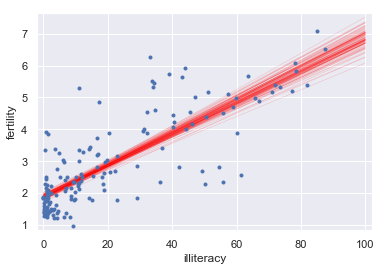

In [116]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(0, 100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

You now have some serious chops for **parameter estimation**. Let's move on to **hypothesis testing**!

When we were doing linear regression we assumed a linear model for how the data are generated and then **estimated the parameters** that are defined by that model. But how reasonable it is that our observed data are actually described by the model? This is the realm of **hypothesis testing**.

## Generating a permutation sample

**Permutation sampling** is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

- `H0` (null hypothesis) = two samples come from the same probability distribution.
- `H1` (alternative hypothesis) = two samples do not come from the same probability distribution.

Remember, a **permutation sample** of two arrays having respectively n1 and n2 entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first n1 entries as the permutation sample of the first array and the last n2 entries as the permutation sample of the second array.

In [117]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

## Visualizing permutation sampling

To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

The data are stored in the Numpy arrays `rain_june` and `rain_november`.

As a reminder, `permutation_sample()` has a function signature of `permutation_sample(data_1, data_2)` with a return value of `permuted_data[:len(data_1)]`, `permuted_data[len(data_1):]`, where `permuted_data = np.random.permutation(np.concatenate((data_1, data_2)))`.

- Write a for loop to generate 50 permutation samples, compute their ECDFs, and plot them.
    - Generate a permutation sample pair from `rain_june` and `rain_november` using your `permutation_sample()` function.
    - Generate the x and y values for an ECDF for each of the two permutation samples for the ECDF using your `ecdf()` function.
    - Plot the ECDF of the first permutation sample (x_1 and y_1) as dots. Do the same for the second permutation sample (x_2 and y_2).
- Generate x and y values for ECDFs for the `rain_june` and `rain_november` data and plot the ECDFs using respectively the keyword arguments `color='red'` and `color='blue'`.
- Label your axes, set a 2% margin, and show your plot.

In [119]:
rain_june = np.array([66.2, 39.7, 76.4, 26.5, 11.2, 61.8, 6.1, 48.4, 89.2, 104.0, 34.0, 60.6, 57.1, 79.1, 90.9, 32.3, 63.8, 78.2, 27.5, 43.4, 30.1, 17.3, 77.5, 44.9, 92.2, 39.6, 79.4, 66.1, 53.5, 98.5, 20.8, 55.5, 39.6, 56.0, 65.1, 14.8, 13.2, 88.1, 8.4, 32.1, 19.6, 40.4, 2.2, 77.5, 105.4, 77.2, 38.0, 27.1, 111.8, 17.2, 26.7, 23.3, 77.2, 87.2, 27.7, 50.6, 60.3, 15.1, 6.0, 29.4, 39.3, 56.3, 80.4, 85.3, 68.4, 72.5, 13.3, 28.4, 14.7, 37.4, 49.5, 57.2, 85.9, 82.1, 31.8, 126.6, 30.7, 41.4, 33.9, 13.5, 99.1, 70.2, 91.8, 61.3, 13.7, 54.9, 62.5, 24.2, 69.4, 83.1, 44.0, 48.5, 11.9, 16.6, 66.4, 90.0, 34.9, 132.8, 33.4, 225.0, 7.6, 40.9, 76.5, 48.0, 140.0, 55.9, 54.1, 46.4, 68.6, 52.2, 108.3, 14.6, 11.3, 29.8, 130.9, 152.4, 61.0, 46.6, 43.9, 30.9, 111.1, 68.5, 42.2, 9.8, 285.6, 56.7, 168.2, 41.2, 47.8, 166.6, 37.8, 45.4, 43.2])
rain_november = np.array([83.6, 30.9, 62.2, 37.0, 41.0, 160.2, 18.2, 122.4, 71.3, 44.2, 49.1, 37.6, 114.5, 28.8, 82.5, 71.9, 50.7, 67.7, 112.0, 63.6, 42.8, 57.2, 99.1, 86.4, 84.4, 38.1, 17.7, 102.2, 101.3, 58.0, 82.0, 101.4, 81.4, 100.1, 54.6, 39.6, 57.5, 29.2, 48.8, 37.3, 115.4, 55.6, 62.0, 95.0, 84.2, 118.1, 153.2, 83.4, 104.7, 59.0, 46.4, 50.0, 147.6, 76.8, 59.9, 101.8, 136.6, 173.0, 92.5, 37.0, 59.8, 142.1, 9.9, 158.2, 72.6, 28.0, 112.9, 119.3, 199.2, 50.7, 44.0, 170.7, 67.2, 21.4, 61.3, 15.6, 106.0, 116.2, 42.3, 38.5, 132.5, 40.8, 147.5, 93.9, 71.4, 87.3, 163.7, 141.4, 62.6, 84.9, 28.8, 121.1, 28.6, 32.4, 112.0, 50.0, 96.9, 81.8, 70.4, 117.5, 41.2, 124.9, 78.2, 93.0, 53.5, 50.5, 42.6, 47.9, 73.1, 129.1, 56.9, 103.3, 60.5, 134.3, 93.1, 49.5, 48.2, 167.9, 27.0, 111.1, 55.4, 36.2, 57.4, 66.8, 58.3, 60.0, 161.6, 112.7, 37.4, 110.6, 56.6, 95.8, 126.8])


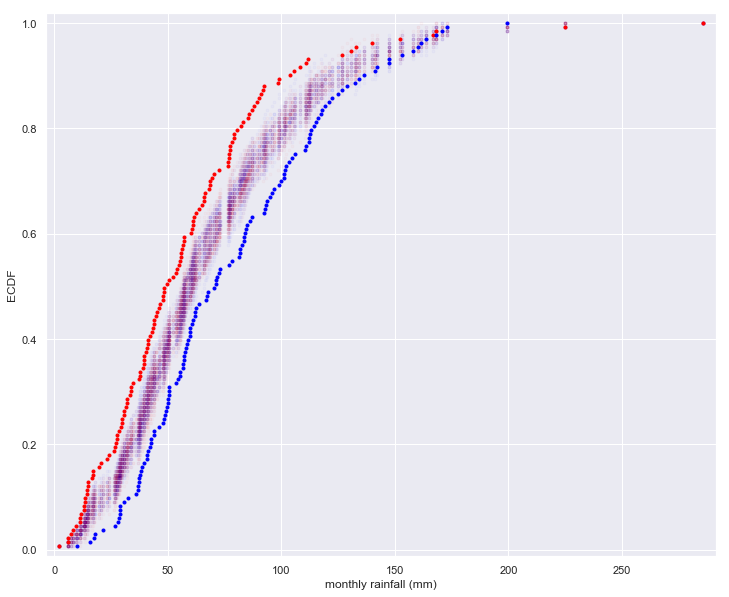

In [124]:
np.random.seed(42)
plt.figure(figsize=(12,10))

for _ in range(0, 50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Notice that the permutation samples ECDFs overlap and give a purple haze. `None of the ECDFs from the permutation samples overlap with the observed data`, suggesting that the hypothesis is not commensurate with the data. `June and November rainfall are not identically distributed`.

## Hypothesis Testing

**Hypothesis Testing** is an assessment of how reasonable the observed data are assuming a hypothesis is true. But what about data do we assess and how do we quantify the assessment? The answer to this question hinges on the concept of a **test statistic**.

## Test statistic

A **test statistic** is a single number that can be computed from observed data and from data you simulate under the **null hypothesis**. It serves as basis of comparison between the two (what the hypothesis predistcs and what we actually observed).

When performing **hypothesis tests**, your choice of **test statistic** `should be pertinent to the question` you are seeking to answer in your **hypothesis test**. The most important thing to consider is: What are you asking?

For example, if two samples come from the same probability distribution, distribution means. So the difference between means should be zero. We can then choose `the difference in means` as our **test statistic**.

## What is a p-value?

<img src="images/p-value.png" alt="" style="width: 600px;"/>

The **p-value** is generally a measure of: `the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true`. **p-value** is NOT the probability that the null hypothesis is true. Further, the **p-value** is only meaningful if the null hypothesis is clearly stated along with the test statistic used to evaluate it.

When the **p-value** is small, it is often said that the data are **statistically significantly different** than what we would observed under the null hypothesis. **Statistical significance** (that is low **p-values**) and **practical significance** whether or not the difference of the data from the null hypothesis matters for practical considerations, are two different things.

<img src="images/practical-statistical-significance.png" alt="" style="width: 600px;"/>

## Generating permutation replicates

A **permutation replicate** is a single value of a statistic computed from a permutation sample. As the `draw_bs_reps()` function is useful for you to generate bootstrap replicates, it is useful to have a similar function, `draw_perm_reps()`, to generate permutation replicates. You will write this useful function in this exercise.

The function has call `signature draw_perm_reps(data_1, data_2, func, size=1)`. Importantly, func must be a function that takes two arrays as arguments. In most circumstances, `func` will be a function you write yourself.